In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = pd.read_csv("tested.csv")

In [3]:
file.shape

(418, 12)

In [4]:
file.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Variable Identification

In [6]:
file.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# continuous - continuous Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Fare'>

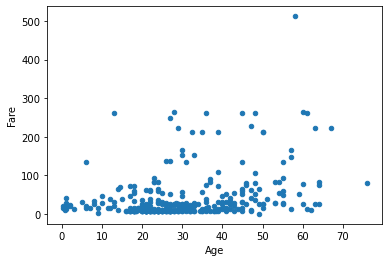

In [7]:
# scatter plot 
file.plot.scatter('Age','Fare')

In [8]:
#correlation
file.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [9]:
file['Age'].corr(file['Fare'])

0.3379315845519922

# catogorical - continuous Bivariate Analysis

<AxesSubplot:xlabel='Sex'>

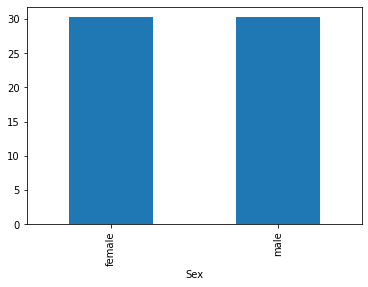

In [11]:
#bar plot
file.groupby('Sex')['Age'].mean().plot.bar()

In [12]:
#importing the libraries to calculate the sample ttest
from scipy.stats import ttest_ind

In [13]:
males = file[file['Sex']=='male']

In [14]:
females = file[file['Sex']=='females']

In [21]:

# Check for missing values
print("Missing values in males' Age column:", males['Age'].isna().sum())
print("Missing values in females' Age column:", females['Age'].isna().sum())

# Handle missing values (e.g., impute or remove them)
# Assuming you want to fill missing values with the median
males['Age'].fillna(males['Age'].median(), inplace=True)
females['Age'].fillna(females['Age'].median(), inplace=True)

# Perform t-test
result = ttest_ind(males['Age'], females['Age'])
print(result)



Missing values in males' Age column: 0
Missing values in females' Age column: 0
Ttest_indResult(statistic=nan, pvalue=nan)


C:\Users\xspark\AppData\Local\Temp\ipykernel_7884\205331574.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['Age'].fillna(males['Age'].median(), inplace=True)
C:\Users\xspark\AppData\Local\Temp\ipykernel_7884\205331574.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  females['Age'].fillna(females['Age'].median(), inplace=True)


# catogorical - catogorical Bivariate Analysis

In [22]:
#create a two way table to see the relationship
pd.crosstab(file['Sex'],file['Survived'])

Survived,0,1
Sex,,
female,0,152
male,266,0


In [24]:
#chi-square
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(file['Sex'],file['Survived']))

(413.6897405343716,
 5.767311139789629e-92,
 1,
 array([[ 96.72727273,  55.27272727],
        [169.27272727,  96.72727273]]))